<a href="https://colab.research.google.com/github/regiwa/projectone/blob/master/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price (AAPL) using the past 60 days stock price

In [3]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#from keras.models import Sequential
#from keras.layers import Dense, LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01',end='2020-04-06')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-03-31,262.489990,252.000000,255.600006,254.289993,49250500.0,254.289993
2020-04-01,248.720001,239.130005,246.500000,240.910004,44054600.0,240.910004
2020-04-02,245.149994,236.899994,240.339996,244.929993,41483500.0,244.929993


In [5]:
#get the number of rows and cols in the dataset
df.shape

(2078, 6)

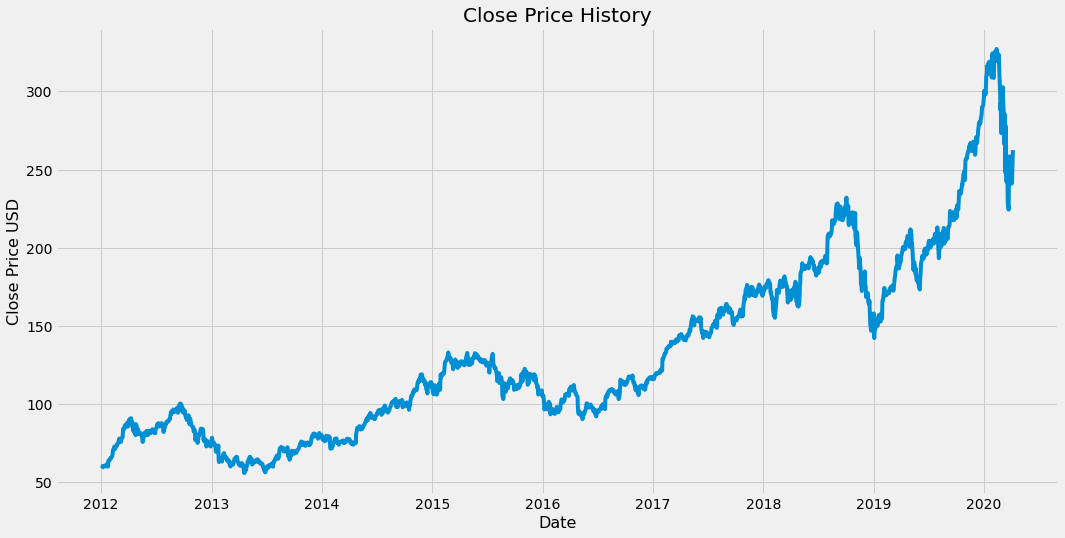

In [6]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD', fontsize=16)
plt.show()

In [7]:
#create a new DF with only the close column
data = df.filter(['Close'])
#convert DF to numpy array
dataset = data.values
#get the number of rows to train the model on
train_data_len = math.ceil(len(dataset)*.8)

train_data_len

1663

In [8]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.6968792 ],
       [0.68390993],
       [0.7615047 ]])

In [9]:
#create training dataset
#create scaled training dataset
train_data = scaled_data[0:train_data_len, :]
#split data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
  

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [0]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#reshape the data to 3 dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1603, 60, 1)

In [0]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
# model.add(Dense(6, init = 'uniform', activation = 'relu', input_shape = (11,)))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1603/1603 [==============================] - 36s 22ms/step - loss: 6.8418e-04


In [0]:
#create test dataset
#create new array containing scaled values from index (1663-60) to 2077
test_data = scaled_data[train_data_len-60:, :]
#create dataset x_test, y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#convert data to numpy array
x_test = np.array(x_test)

In [0]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

15.949214279874825

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


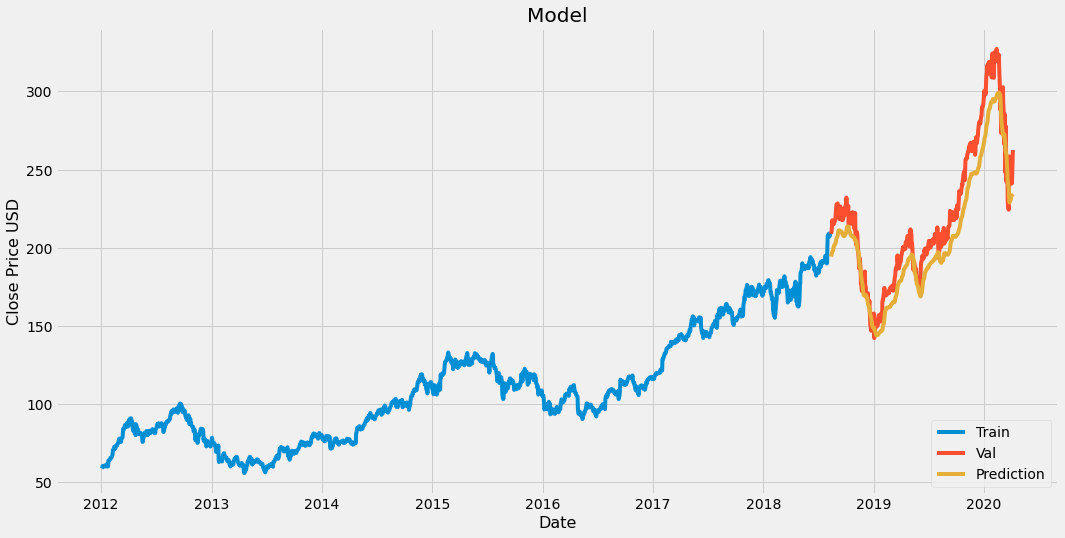

In [20]:
#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.show()

In [21]:
#show the valid and prediction price
valid

,Close,Predictions
Date,,
2018-08-13,208.869995,194.354630
2018-08-14,209.750000,195.121384
2018-08-15,210.240005,195.802582
2018-08-16,213.320007,196.414459
2018-08-17,217.580002,197.229782
...,...,...
2020-03-31,254.289993,232.071304
2020-04-01,240.910004,233.548874
2020-04-02,244.929993,233.573212


In [22]:
#Now predict price for today 2020-04-07
#use latest data, convert to numpy array
last_60day = data[-60:].values
#scale the data
last_60day_scaled = scaler.transform(last_60day)
#create empty list, append the past 60 days
xx_test = []
xx_test.append(last_60day_scaled)
#convert to numpy array
xx_test = np.array(xx_test)
#reshape data
xx_test = np.reshape(xx_test, (xx_test.shape[0], xx_test.shape[1],1))
#get predicted price
pred = model.predict(xx_test)
pred = scaler.inverse_transform(pred)
print(pred)


[[233.66196]]


In [23]:
#get actual quote
apple = web.DataReader('AAPL',data_source='yahoo',start='2020-04-07',end='2020-04-07')
print(apple['Close'])

Date
2020-04-07    259.429993
Name: Close, dtype: float64
